<a href="https://colab.research.google.com/github/Dhanraj7573/Python-Projects/blob/main/Airline_Safety_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Airline Safety Analysis

This project aims to explore airline safety data from 1985 to 2014. We will analyze various metrics such as incidents, fatal accidents, and fatalities, to understand trends and identify airlines with better or worse safety records over different periods.

In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv"
df = pd.read_csv(url)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [17]:
df['airline'].nunique()
df.head(5)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [18]:
print(df['airline'].nunique())
display(df.head(5))

56


,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [19]:
incidents_cols = ['incidents_85_99', 'incidents_00_14']
fatal_accidents_cols = ['fatal_accidents_85_99', 'fatal_accidents_00_14']
fatalities_cols = ['fatalities_85_99', 'fatalities_00_14']

all_cols = incidents_cols + fatal_accidents_cols + fatalities_cols

mean_stats = df[all_cols].mean()
median_stats = df[all_cols].median()
min_stats = df[all_cols].min()
max_stats = df[all_cols].max()

summary_df = pd.DataFrame({
    'Mean': mean_stats,
    'Median': median_stats,
    'Min': min_stats,
    'Max': max_stats
}).transpose()

new_column_names = {
    'incidents_85_99': 'Incidents (85-99)',
    'incidents_00_14': 'Incidents (00-14)',
    'fatal_accidents_85_99': 'Fatal Accidents (85-99)',
    'fatal_accidents_00_14': 'Fatal Accidents (00-14)',
    'fatalities_85_99': 'Fatalities (85-99)',
    'fatalities_00_14': 'Fatalities (00-14)'
}
summary_df = summary_df.rename(columns=new_column_names)

display(summary_df)

,Incidents (85-99),Incidents (00-14),Fatal Accidents (85-99),Fatal Accidents (00-14),Fatalities (85-99),Fatalities (00-14)
Mean,7.178571,4.125,2.178571,0.660714,112.410714,55.517857
Median,4.000000,3.000,1.000000,0.000000,48.500000,0.000000
Min,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
Max,76.000000,24.000,14.000000,3.000000,535.000000,537.000000


## Total Incidents, Fatal Accidents, and Fatalities per Airline

Create new columns for the total number of incidents, fatal accidents, and fatalities by summing the counts from both periods (1985-1999 and 2000-2014). Identify and display the top 5 airlines with the highest total incidents and highest total fatalities. Also, identify airlines with zero total incidents.


In [20]:
total_incidents = df['incidents_85_99'] + df['incidents_00_14']
total_fatal_accidents = df['fatal_accidents_85_99'] + df['fatal_accidents_00_14']
total_fatalities = df['fatalities_85_99'] + df['fatalities_00_14']

sd = pd.DataFrame({
    'airline': df['airline'],
    'total_incidents': total_incidents,
    'total_fatal_accidents': total_fatal_accidents,
    'total_fatalities': total_fatalities
})
display(sd.head())

a_incidents = sd.sort_values(by = 'total_incidents', ascending = False).head(5)
display(a_incidents)

b_fatalities = sd.sort_values(by = 'total_fatalities', ascending = False).head(5)
display(b_fatalities)

zero_incidents_airlines = sd[sd['total_incidents'] == 0]
display(zero_incidents_airlines)

,airline,total_incidents,total_fatal_accidents,total_fatalities
0,Aer Lingus,2,0,0
1,Aeroflot*,82,15,216
2,Aerolineas Argentinas,7,0,0
3,Aeromexico*,8,1,64
4,Air Canada,4,0,0


,airline,total_incidents,total_fatal_accidents,total_fatalities
1,Aeroflot*,82,15,216
19,Delta / Northwest*,48,14,458
11,American*,38,8,517
51,United / Continental*,33,10,428
22,Ethiopian Airlines,30,7,259


,airline,total_incidents,total_fatal_accidents,total_fatalities
16,China Airlines,14,7,760
34,Malaysia Airlines,6,3,571
28,Japan Airlines,3,1,520
11,American*,38,8,517
6,Air India*,6,2,487


,airline,total_incidents,total_fatal_accidents,total_fatalities
48,TAP - Air Portugal,0,0,0


## Calculate Incident and Fatal Accident Rates

Compute incident and fatal accident rates per billion available seat kilometers per week for both time periods, normalizing data by exposure. Display the DataFrame with these new rate columns.


In [21]:
SCALE = 1e9

df['incident_rate_85_99'] = (df['incidents_85_99'] / df['avail_seat_km_per_week']) * SCALE
df['incident_rate_00_14'] = (df['incidents_00_14'] / df['avail_seat_km_per_week']) * SCALE
df['fatal_acc_rate_85_99'] = (df['fatal_accidents_85_99'] / df['avail_seat_km_per_week']) * SCALE
df['fatal_acc_rate_00_14'] = (df['fatal_accidents_00_14'] / df['avail_seat_km_per_week']) * SCALE

display(df.head())

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incident_rate_85_99,incident_rate_00_14,fatal_acc_rate_85_99,fatal_acc_rate_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0,6.232340,0.000000,0.000000,0.000000
1,Aeroflot*,1197672318,76,14,128,6,1,88,63.456422,5.009718,11.689341,0.834953
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0,15.551952,2.591992,0.000000,0.000000
3,Aeromexico*,596871813,3,1,64,5,0,0,5.026205,8.377008,1.675402,0.000000
4,Air Canada,1865253802,2,0,0,2,0,0,1.072240,1.072240,0.000000,0.000000



To identify the top 5 airlines with the highest number of fatal incidents during 2000-2014, I will sort the DataFrame by 'fatal_accidents_00_14' in descending order and then select and display the relevant columns for the top 5 entries.



In [22]:
top_fatal_incidents_00_14 = df.sort_values(by='fatal_accidents_00_14', ascending=False).head(5)
display(top_fatal_incidents_00_14[['airline', 'fatal_accidents_00_14']])

,airline,fatal_accidents_00_14
11,American*,3
5,Air France,2
19,Delta / Northwest*,2
22,Ethiopian Airlines,2
35,Pakistan International,2


## Analyze Change in Incident Rates Between Periods

Calculate the percentage change in incident rates from the 1985-1999 period to the 2000-2014 period to identify airlines that have shown significant improvement or worsening in their safety performance.


In [23]:
import numpy as np

def calculate_percentage_change(old_rate, new_rate):
    if old_rate == 0:
        if new_rate == 0:
            return 0.0  # No change if both are zero
        else:
            return np.inf  # Infinite increase from zero
    return ((new_rate - old_rate) / old_rate) * 100

df['incident_rate_change_percent'] = df.apply(lambda row: calculate_percentage_change(row['incident_rate_85_99'], row['incident_rate_00_14']), axis=1)

print("\nTop 5 Airlines with Largest Percentage Decrease in Incident Rates (Most Improved):")
display(df.sort_values(by='incident_rate_change_percent', ascending=True).head(5)[['airline', 'incident_rate_85_99', 'incident_rate_00_14', 'incident_rate_change_percent']])

print("\nTop 5 Airlines with Largest Percentage Increase in Incident Rates (Most Worsened):")
display(df.sort_values(by='incident_rate_change_percent', ascending=False).head(5)[['airline', 'incident_rate_85_99', 'incident_rate_00_14', 'incident_rate_change_percent']])


Top 5 Airlines with Largest Percentage Decrease in Incident Rates (Most Improved):


,airline,incident_rate_85_99,incident_rate_00_14,incident_rate_change_percent
0,Aer Lingus,6.232340,0.0,-100.0
13,Avianca,12.596916,0.0,-100.0
18,COPA,5.449675,0.0,-100.0
17,Condor,4.784888,0.0,-100.0
28,Japan Airlines,1.905709,0.0,-100.0



Top 5 Airlines with Largest Percentage Increase in Incident Rates (Most Worsened):


,airline,incident_rate_85_99,incident_rate_00_14,incident_rate_change_percent
15,Cathay Pacific*,0.000000,0.774456,inf
26,Hawaiian Airlines,0.000000,2.024792,inf
43,Southwest Airlines,0.305201,2.441611,700.0
37,Qantas*,0.521532,2.607659,400.0
25,Gulf Air,3.318073,9.954218,200.0


## Correlation Analysis: Exposure vs. Incidents

Compute and display the Pearson correlation coefficient between 'avail_seat_km_per_week' (exposure) and 'incidents' for both the 1985-1999 and 2000-2014 periods to understand the relationship between airline size and incident frequency.


In [24]:
corr_85_99 = df['avail_seat_km_per_week'].corr(df['incidents_85_99'])
corr_00_14 = df['avail_seat_km_per_week'].corr(df['incidents_00_14'])

print(f"Correlation between exposure and incidents (1985-1999): {corr_85_99:.4f}")
print(f"Correlation between exposure and incidents (2000-2014): {corr_00_14:.4f}")

Correlation between exposure and incidents (1985-1999): 0.2795
Correlation between exposure and incidents (2000-2014): 0.7259


## Outlier Detection in Fatalities (2000-2014)

Use the Z-score method to identify and display airlines that are statistical outliers in terms of fatalities during the 2000-2014 period, specifically those with `|z| > 2`.


In [25]:
import numpy as np
from scipy import stats

# Calculate the z-score for 'fatalities_00_14'
z_score_fatalities_00_14 = stats.zscore(df['fatalities_00_14'])

# Identify outliers where the absolute z-score is greater than 2
outliers_fatalities_00_14 = df[np.abs(z_score_fatalities_00_14) > 2]

# Display the resulting DataFrame containing the outlier airlines
display(outliers_fatalities_00_14)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incident_rate_85_99,incident_rate_00_14,fatal_acc_rate_85_99,fatal_acc_rate_00_14,incident_rate_change_percent
5,Air France,3004002661,14,4,79,6,2,337,4.660449,1.997335,1.331557,0.665778,-57.142857
11,American*,5228357340,21,5,101,17,3,416,4.016558,3.251499,0.956323,0.573794,-19.047619
29,Kenya Airways,277414794,2,0,0,2,2,283,7.209421,7.209421,0.000000,7.209421,0.000000
34,Malaysia Airlines,1039171244,3,1,34,3,2,537,2.886916,2.886916,0.962305,1.924611,0.000000


## Create Custom Safety Scores

Define and calculate a custom 'safety score' for each airline for both periods (1985-1999 and 2000-2014), explaining the weighting used for incidents, fatal accidents, and fatalities. Display the top 5 airlines with the highest safety scores for the 1985-1999 period.


In [26]:
inc_weight = 1
fatal_acc_weight = 5
fatalities_weight = 0.01

score_85_99 = (df['incidents_85_99'] * inc_weight) + (df['fatal_accidents_85_99'] * fatal_acc_weight) + (df['fatalities_85_99'] * fatalities_weight)
score_00_14 = (df['incidents_00_14'] * inc_weight) + (df['fatal_accidents_00_14'] * fatal_acc_weight) + (df['fatalities_00_14'] * fatalities_weight)

dc = pd.DataFrame({
    'airline': df['airline'],
    'score_85_99': score_85_99,
    'score_00_14': score_00_14
})

print("Top 5 airlines with the highest safety scores for 1985-1999:")
display(dc.sort_values(by='score_85_99', ascending=False).head(5))

Top 5 airlines with the highest safety scores for 1985-1999:


,airline,score_85_99,score_00_14
1,Aeroflot*,147.28,11.88
19,Delta / Northwest*,88.07,34.51
51,United / Continental*,62.19,25.09
52,US Airways / America West*,53.24,21.23
22,Ethiopian Airlines,51.67,15.92


## Safety Score Change Table (Delta Analysis)

Create a 'change table' by calculating the delta (difference) between the 2000-2014 safety score and the 1985-1999 safety score. Display the airlines that show the most improvement (largest negative delta) and those that worsened the most (largest positive delta).


In [27]:
dc['delta'] = dc['score_00_14'] - dc['score_85_99']

print("Airlines with Most Improvement (largest negative delta):")
display(dc.sort_values(by='delta', ascending=True).head(5))

print("\nAirlines that Worsened the Most (largest positive delta):")
display(dc.sort_values(by='delta', ascending=False).head(5))

Airlines with Most Improvement (largest negative delta):


,airline,score_85_99,score_00_14,delta
1,Aeroflot*,147.28,11.88,-135.40
19,Delta / Northwest*,88.07,34.51,-53.56
31,Korean Air,41.25,1.00,-40.25
16,China Airlines,47.35,9.25,-38.10
51,United / Continental*,62.19,25.09,-37.10



Airlines that Worsened the Most (largest positive delta):


,airline,score_85_99,score_00_14,delta
29,Kenya Airways,2.00,14.83,12.83
34,Malaysia Airlines,8.34,18.37,10.03
25,Gulf Air,1.00,9.43,8.43
39,SAS*,5.00,12.10,7.10
7,Air New Zealand*,3.00,10.07,7.07


## Advanced Safety Score and Bucketing

Refine the safety scoring by converting incident metrics into rates per distance and applying a weighted score for the 2000-2014 period. Categorize airlines into 'Better', 'Average', and 'Worse' safety buckets using percentiles. Display the top 10 best and worst airlines based on this advanced safety score.


In [28]:
import pandas as pd

# 1) Rates per distance (scaled so numbers look nicer)
SCALE = 1e9  # optional (ranking stays the same)

inc_rate_00_14 = (df["incidents_00_14"] / df["avail_seat_km_per_week"]) * SCALE
fatal_acc_rate_00_14 = (df["fatal_accidents_00_14"] / df["avail_seat_km_per_week"]) * SCALE
fatalities_rate_00_14 = (df["fatalities_00_14"] / df["avail_seat_km_per_week"]) * SCALE

# 2) Simple weighted score (fatal stuff counts more)
score_00_14 = inc_rate_00_14*1 + fatal_acc_rate_00_14*3 + fatalities_rate_00_14*0.5

# 3) Buckets (Better / Average / Worse) using percentiles
labels = ["Better", "Average", "Worse"]
buckets = pd.qcut(
    score_00_14.rank(method="first"),
    q=[0, 0.25, 0.75, 1],
    labels=labels
)

# 4) Summary table
ac = pd.DataFrame({
    "airline": df["airline"],
    "score_00_14": score_00_14,
    "inc_rate_00_14": inc_rate_00_14,
    "fatal_acc_rate_00_14": fatal_acc_rate_00_14,
    "fatalities_rate_00_14": fatalities_rate_00_14,
    "Bucket": buckets
}).sort_values("score_00_14")

# Optional: Top 10 best/worst
top10_best = ac.head(10)
top10_worst = ac.tail(10).sort_values("score_00_14", ascending=False)

display(top10_best)
display(top10_worst)

,airline,score_00_14,inc_rate_00_14,fatal_acc_rate_00_14,fatalities_rate_00_14,Bucket
0,Aer Lingus,0.000000,0.000000,0.0,0.0,Better
13,Avianca,0.000000,0.000000,0.0,0.0,Better
18,COPA,0.000000,0.000000,0.0,0.0,Better
17,Condor,0.000000,0.000000,0.0,0.0,Better
28,Japan Airlines,0.000000,0.000000,0.0,0.0,Better
23,Finnair,0.000000,0.000000,0.0,0.0,Better
48,TAP - Air Portugal,0.000000,0.000000,0.0,0.0,Better
32,LAN Airlines,0.000000,0.000000,0.0,0.0,Better
54,Virgin Atlantic,0.000000,0.000000,0.0,0.0,Better
30,KLM*,0.533458,0.533458,0.0,0.0,Better


,airline,score_00_14,inc_rate_00_14,fatal_acc_rate_00_14,fatalities_rate_00_14,Bucket
29,Kenya Airways,538.904209,7.209421,7.209421,1020.133050,Worse
34,Malaysia Airlines,267.039722,2.886916,1.924611,516.757948,Worse
25,Gulf Air,257.150644,9.954218,3.318073,474.484415,Worse
16,China Airlines,144.487971,2.459370,1.229685,276.679093,Worse
22,Ethiopian Airlines,116.669242,10.234144,4.093658,188.308251,Worse
35,Pakistan International,111.887907,28.689207,5.737841,131.970352,Worse
6,Air India*,98.935460,4.601649,1.150412,181.765147,Worse
39,SAS*,93.708108,8.785135,1.464189,161.060810,Worse
47,TAM,70.898694,4.638232,1.325209,124.569668,Worse
5,Air France,60.086498,1.997335,0.665778,112.183656,Worse


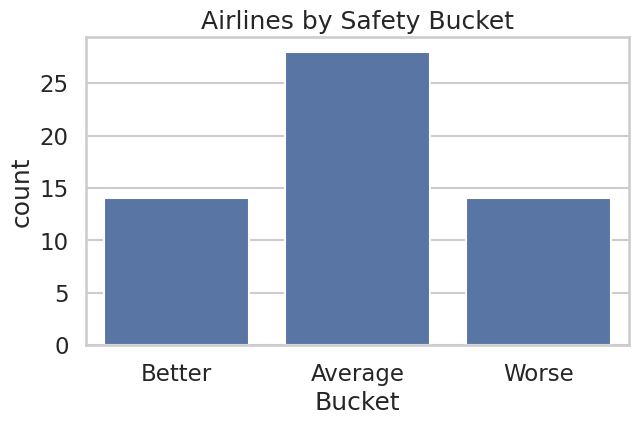

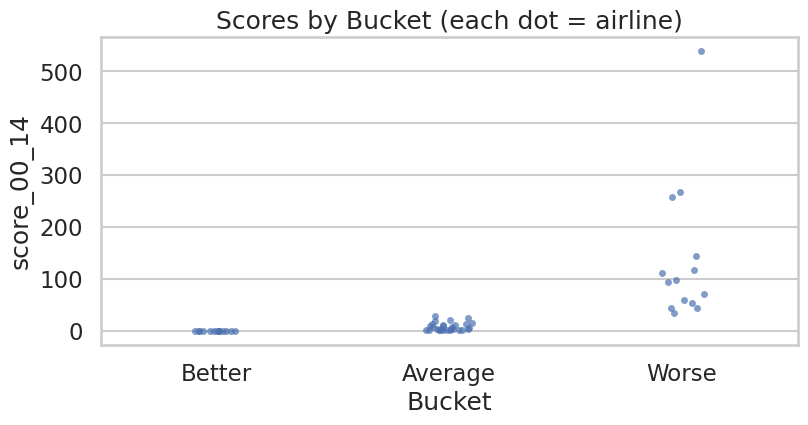

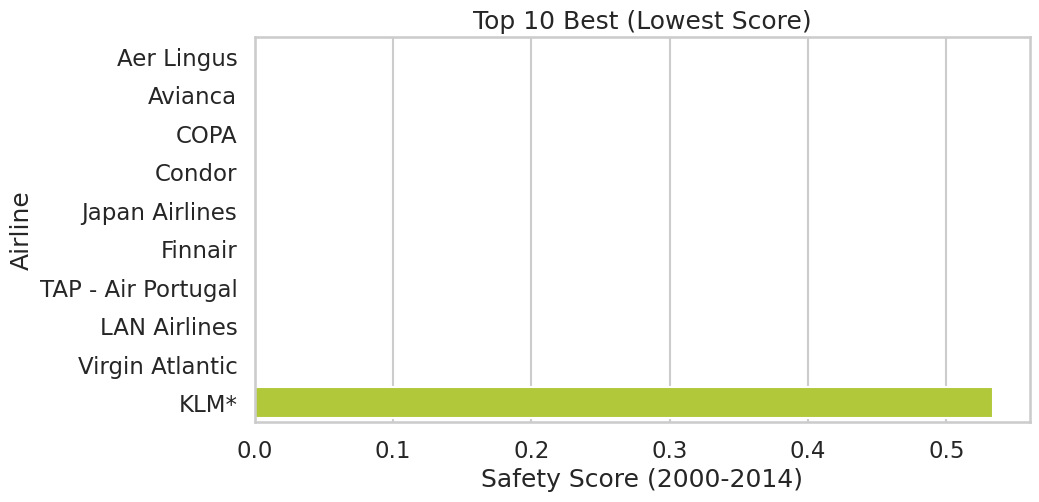

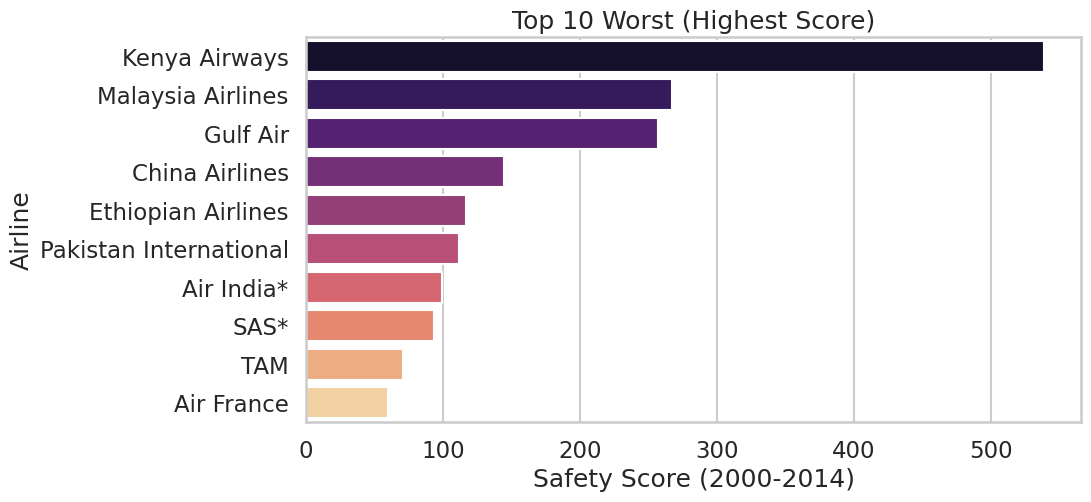

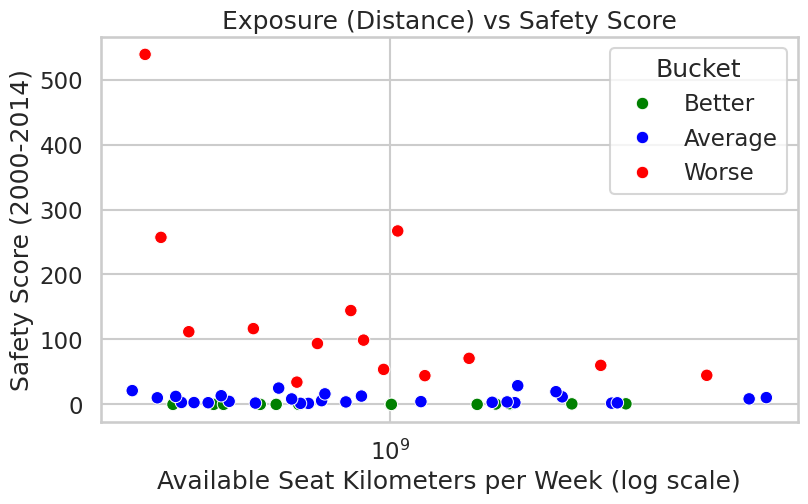

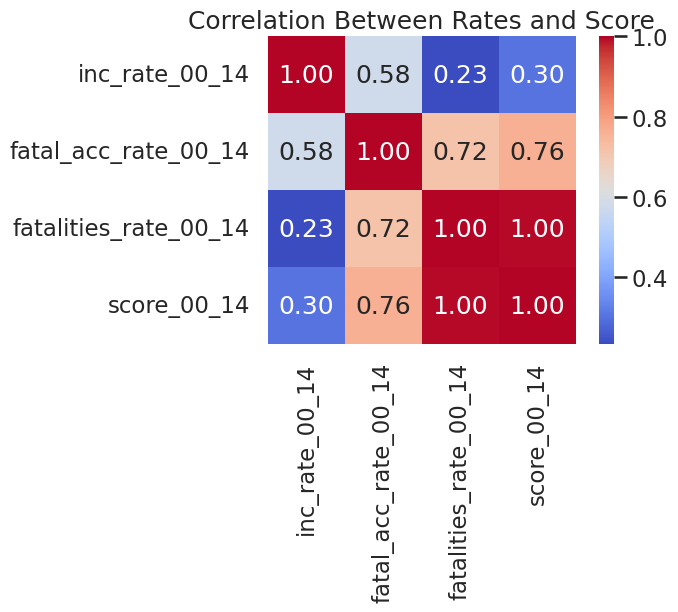

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")  # clean + readable

# Ensure ac has 'avail_seat_km_per_week' for later plots by merging it early
ac = ac.merge(df[["airline","avail_seat_km_per_week"]], on="airline", how="left")

# 3. Count plot for safety buckets
plt.figure(figsize=(7,4))
sns.countplot(data=ac, x="Bucket", order=["Better","Average","Worse"])
plt.title("Airlines by Safety Bucket")
plt.show()

# 4. Stripplot for scores by bucket
plt.figure(figsize=(9,4))
sns.stripplot(data=ac, x="Bucket", y="score_00_14", order=["Better","Average","Worse"], jitter=True, alpha=0.7)
plt.title("Scores by Bucket (each dot = airline)")
plt.show()

# 5. Bar plot for top 10 best airlines
plt.figure(figsize=(10,5))
sns.barplot(data=top10_best, y="airline", x="score_00_14", hue="airline", legend=False, palette="viridis")
plt.title("Top 10 Best (Lowest Score)")
plt.xlabel("Safety Score (2000-2014)")
plt.ylabel("Airline")
plt.show()

# 6. Bar plot for top 10 worst airlines
plt.figure(figsize=(10,5))
sns.barplot(data=top10_worst, y="airline", x="score_00_14", hue="airline", legend=False, palette="magma")
plt.title("Top 10 Worst (Highest Score)")
plt.xlabel("Safety Score (2000-2014)")
plt.ylabel("Airline")
plt.show()

# 8. Scatter plot for Exposure vs Safety Score
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=ac,
    x="avail_seat_km_per_week",
    y="score_00_14",
    hue="Bucket",
    hue_order=["Better","Average","Worse"],
    palette={'Better': 'green', 'Average': 'blue', 'Worse': 'red'}
)
plt.xscale("log")  # usually needed because exposure varies a lot
plt.title("Exposure (Distance) vs Safety Score")
plt.xlabel("Available Seat Kilometers per Week (log scale)")
plt.ylabel("Safety Score (2000-2014)")
plt.show()

# 9. Heatmap for correlations
cols = ["inc_rate_00_14","fatal_acc_rate_00_14","fatalities_rate_00_14","score_00_14"]
plt.figure(figsize=(6,4))
sns.heatmap(ac[cols].corr(), annot=True, fmt=".2f", square=True, cmap="coolwarm")
plt.title("Correlation Between Rates and Score")
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: The analysis involved a dataset of 56 airlines, with safety metrics (incidents, fatal accidents, fatalities) categorized into two periods: 1985-1999 and 2000-2014. The data was clean, with no missing values.
*   **Overall Safety Improvement**: Key summary statistics show a general improvement in airline safety over time. Mean and median values for incidents, fatal accidents, and fatalities were consistently lower in the 2000-2014 period compared to 1985-1999. For example, the median fatal accidents and fatalities in 2000-2014 were both 0.
*   **Variability Across Airlines**: There's significant disparity in safety performance. Airlines like Aeroflot\* had the highest total incidents (82) and significant fatalities (216) across both periods, while TAP - Air Portugal recorded 0 total incidents.
*   **Top 5 Airlines by Total Incidents/Fatalities**:
    *   Highest Total Incidents (both periods): Aeroflot\* (82), Delta / Northwest\* (48), American\* (38).
    *   Highest Total Fatalities (both periods): China Airlines (760), Malaysia Airlines (571), Japan Airlines (520).
*   **Normalized Incident Rates**: Normalizing incidents by available seat kilometers per week provides a more accurate performance comparison. This revealed that airlines like Aer Lingus, Avianca, COPA, Condor, and Japan Airlines significantly improved, showing a -100% change in incident rates by reducing them to 0 in the later period. Conversely, Cathay Pacific\* and Hawaiian Airlines showed an infinite percentage increase, moving from 0 to non-zero incident rates.
*   **Correlation with Exposure**: The correlation between airline exposure (available seat kilometers per week) and incidents became much stronger in the later period, increasing from a weak positive correlation of 0.2795 (1985-1999) to a strong positive correlation of 0.7259 (2000-2014). This suggests larger airlines in the recent period tend to have more raw incidents, though this doesn't directly imply higher risk per passenger.
*   **Outlier Airlines (2000-2014 Fatalities)**: Air France, American\*, Kenya Airways, and Malaysia Airlines were identified as statistical outliers for fatalities in the 2000-2014 period, based on a Z-score threshold of 2.
*   **Custom Safety Score (Delta Analysis)**: A custom safety score, weighted towards fatal accidents, showed Aeroflot\* (-135.40 delta) and Delta / Northwest\* (-53.56 delta) as the most improved airlines, while Kenya Airways (12.83 delta), Malaysia Airlines (10.03 delta), and Gulf Air (8.43 delta) showed the most significant worsening in safety performance based on the change between the two periods.
*   **Advanced Safety Score and Bucketing (2000-2014)**: A refined safety score, based on incident rates per billion available seat kilometers, categorized airlines into 'Better', 'Average', and 'Worse' buckets.
    *   **"Better"**: Included airlines like Aer Lingus, Avianca, COPA, and Japan Airlines (many with a score of 0.0), indicating excellent safety performance in the 2000-2014 period.
    *   **"Worse"**: Included Kenya Airways (highest score at 538.90), Malaysia Airlines (267.04), and Gulf Air (257.15), indicating consistently poor safety performance in the later period.

### Insights or Next Steps

*   **Focus on Outliers and Declining Performers**: Airlines identified as statistical outliers in recent fatalities (e.g., Kenya Airways, Malaysia Airlines) and those showing a significant worsening in safety scores warrant deeper investigation to understand the root causes of their performance and implement targeted safety interventions.
*   **Investigate Correlation Shift**: The significant increase in correlation between exposure and incidents from the earlier to the later period suggests a change in the risk profile for larger airlines. Further analysis could explore if this is due to increased complexity, geographical expansion, or other factors, and whether their incident *rates* (per passenger-km) are also increasing, or just the raw number of incidents due to increased volume.
